In [10]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow as tf

In [2]:
training_text = pd.read_csv('../Data/Keras_training_text', sep='\|\|', engine = 'python')

In [3]:
training_text.head(1)

,ID,Text
0,0,Cyclin dependent kinases regulate a variety of...


In [4]:
training_variants = pd.read_csv('../Data/training_variants')

In [5]:
training_variants.head(1)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1


In [6]:
training_set = training_text.merge(training_variants, on='ID')

In [7]:
training_set.dropna(axis=0, how = 'any',inplace=True)

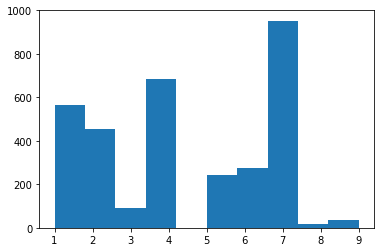

In [8]:
plt.hist(training_set['Class'])
plt.show()

In [9]:
training_set['Class'].value_counts()

7    952
4    686
1    566
2    452
6    273
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [24]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


In [53]:
sess = tf.Session(config=tf.ConfigProto(device_count= {'CPU' : 1}, intra_op_parallelism_threads = 3))
from keras import backend as K
K.set_session(sess)

In [30]:
y = pd.get_dummies(training_set['Class'])

In [31]:
list_train_texts = training_set['Text']

In [32]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_train_texts))
list_tokenized_train = tokenizer.texts_to_sequences(list_train_texts)

In [33]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

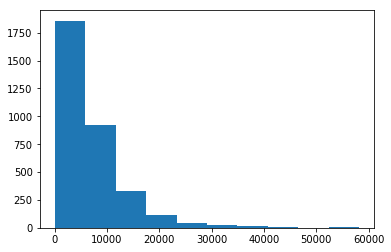

In [34]:
plt.hist(totalNumWords)
plt.show()

In [35]:
maxlen = 15000
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

In [71]:
sess = tf.Session(config=tf.ConfigProto(device_count= {'CPU' : 1}, intra_op_parallelism_threads = 10))
from keras import backend as K
K.set_session(sess)

In [72]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

In [73]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

x = GlobalMaxPool1D()(x)

x = Dropout(0.1)(x)

x = Dense(50, activation="relu")(x)

x = Dropout(0.1)(x)

x = Dense(9, activation="softmax")(x)

In [74]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [75]:
batch_size = 10
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 2984 samples, validate on 332 samples
Epoch 1/2
  10/2984 [..............................] - ETA: 3:22:53 - loss: 2.2138 - acc: 0.1000

KeyboardInterrupt: 